# Changing Model Weights with RandomForest
- I am going to use RandomForest() in comparing how the class weight effects the outcome
- Models created:
    - RandomForest with Repeated Stratified CV
    - RandomForest with Repeated Stratified CV with Balanced Weighting
    - RandomForest with SMOTE and Repeated Stratified CV with Balanced Weighting
    - RandomForest with SMOTE and Repeated Stratified CV with Manual Weighting

In [30]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from evaluator import model_evaluate

In [31]:
# Loading data
# file_path = Path("../data/myopia.csv")
file_path = Path("../eda/reduced_filtered_df.csv")
df = pd.read_csv(file_path)
df.head(1)

<IPython.core.display.Javascript object>

,ACD,LT,VCD,SPORTHR,DADMY,delta_spheq,total_positive_screen,MYOPIC
0,3.702,3.392,15.29,4,1,1.358,8,0


In [32]:
# Check dataset balance
df["MYOPIC"].value_counts()

0    323
1     49
Name: MYOPIC, dtype: int64

In [33]:
# Define X,y
label = df["MYOPIC"]
X = df.iloc[:,:-1].copy()

In [34]:
# Note the use of strategy since the dataset is imbalanced. 
# I am isolaating the X_test and y_test from the preprossing 
X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=42, test_size=0.1, stratify=label)

<IPython.core.display.Javascript object>

## RandomForest with Repeated Stratified CV - baseline model, equal weighting, no data balancing

--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.220
Mean recall: 0.163
Mean precision: 0.378
Mean ROC AUC: 0.802


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29

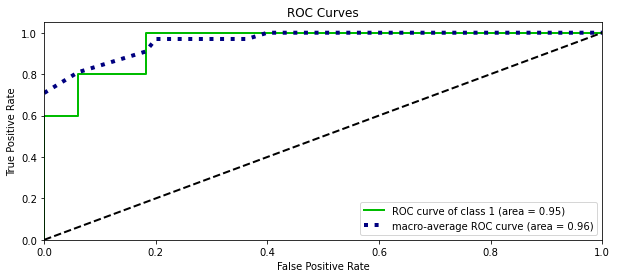



Precision-Recall Curve AUC:  0.81



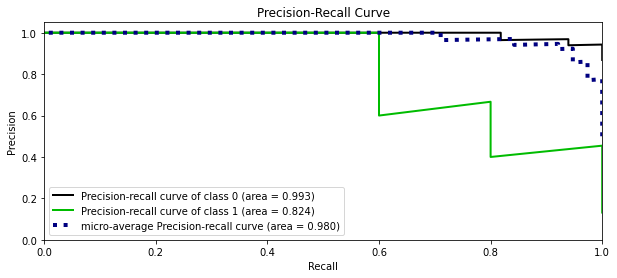

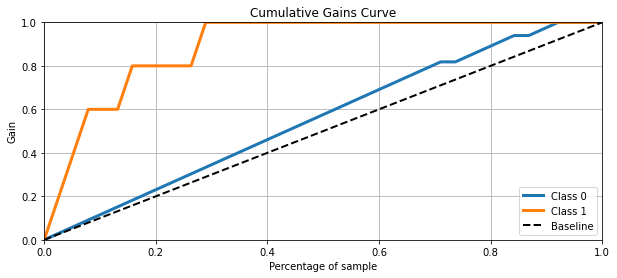

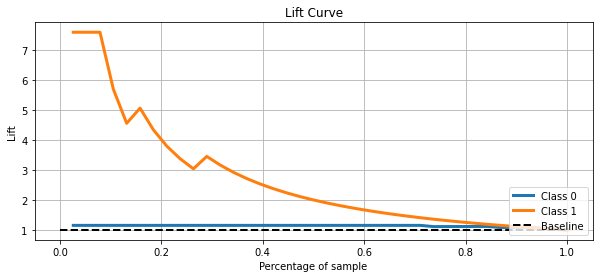



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
       0.0        0.0        0.0
     0.007        0.2        0.0
     0.013        0.6        0.0
      0.02        0.6       0.06
     0.027        0.8       0.06
     0.033        0.8       0.18
      0.04        1.0       0.18
     0.047        1.0       0.24
     0.053        1.0        0.3
      0.06        1.0       0.36
     0.067        1.0       0.52
     0.073        1.0       0.58
     0.087        1.0       0.61
     0.133        1.0       0.73
      0.16        1.0       0.82
     0.167        1.0       0.85
      0.24        1.0       0.91
     0.267        1.0       0.94
     0.307        1.0        1.0




In [35]:
scoring = ('f1', 'recall', 'precision', 'roc_auc')
steps = [('model', RandomForestClassifier(n_estimators=150, random_state=1))]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)

model_evaluate(steps, cv, X_train, y_train, X_test, y_test)

## RandomForest with Repeated Stratified CV with Balanced Weighting

--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.097
Mean recall: 0.065
Mean precision: 0.222
Mean ROC AUC: 0.812


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29

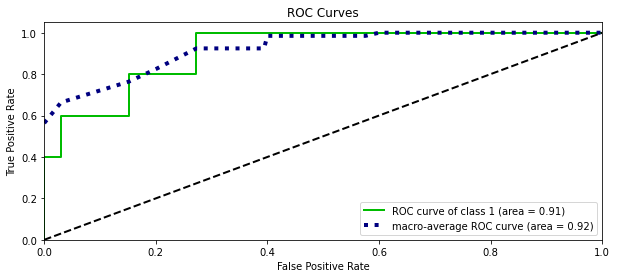



Precision-Recall Curve AUC:  0.69



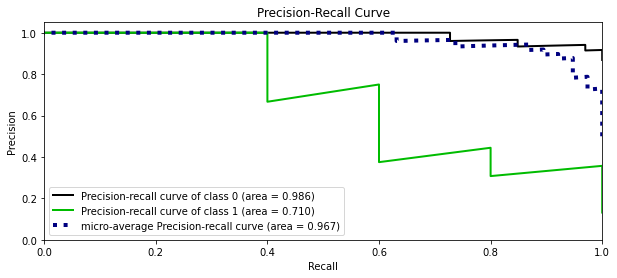

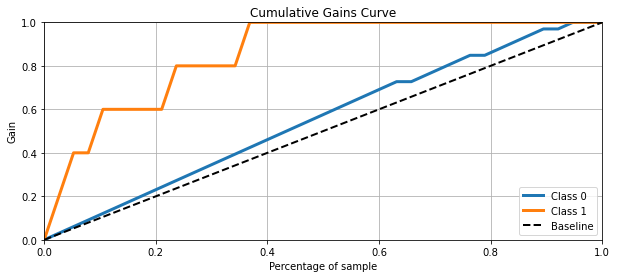

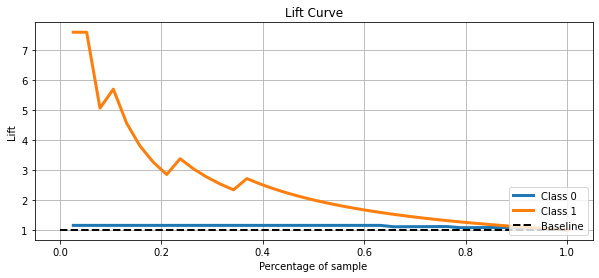



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
       0.0        0.0        0.0
     0.007        0.2        0.0
     0.013        0.4        0.0
      0.02        0.4       0.03
     0.027        0.6       0.03
     0.033        0.6       0.15
      0.04        0.8       0.15
      0.06        0.8       0.27
     0.067        1.0       0.27
     0.073        1.0       0.33
      0.08        1.0       0.39
     0.087        1.0       0.55
       0.1        1.0       0.58
      0.22        1.0       0.76
     0.273        1.0        1.0




In [36]:
scoring = ('f1', 'recall', 'precision', 'roc_auc')
steps = [('model', RandomForestClassifier(class_weight="balanced", n_estimators=150, random_state=1))]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)

model_evaluate(steps, cv, X_train, y_train, X_test, y_test)

## RandomForest with SMOTE and Repeated Stratified CV with Balanced Weighting

--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.414
Mean recall: 0.490
Mean precision: 0.371
Mean ROC AUC: 0.811


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29

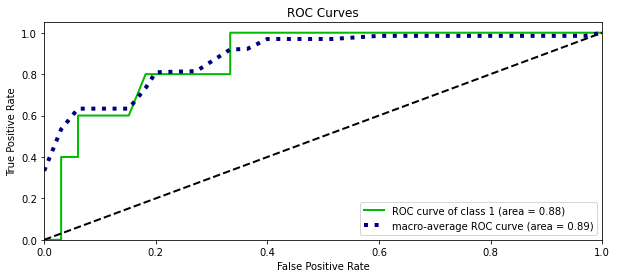



Precision-Recall Curve AUC:  0.41



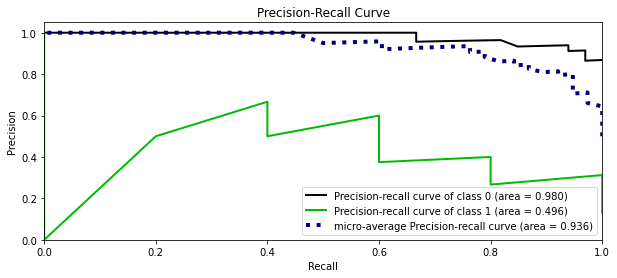

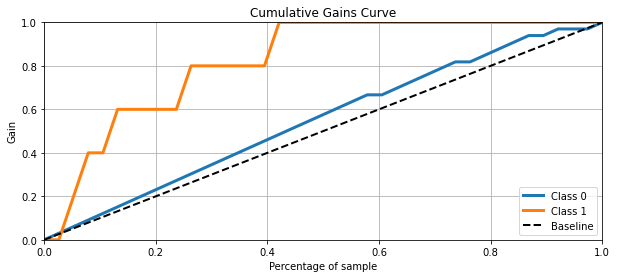

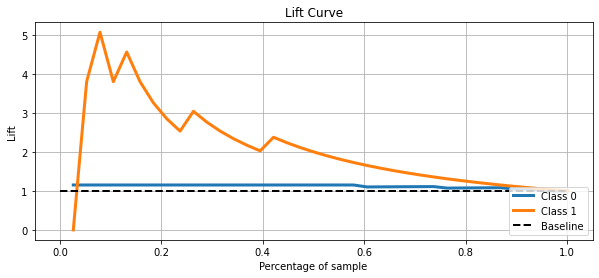



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
     0.007        0.0        0.0
     0.013        0.0       0.03
      0.02        0.4       0.03
     0.027        0.4       0.06
     0.033        0.6       0.06
      0.04        0.6       0.15
     0.047        0.8       0.18
     0.053        0.8       0.27
      0.06        0.8       0.33
     0.067        1.0       0.33
     0.073        1.0       0.36
     0.087        1.0       0.48
     0.107        1.0       0.52
     0.127        1.0       0.61
     0.147        1.0       0.67
     0.213        1.0       0.79
       0.4        1.0       0.97
     0.427        1.0        1.0




In [37]:
irfc = RandomForestClassifier(class_weight="balanced", n_estimators=150, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)
scoring = ('f1', 'recall', 'precision', 'roc_auc')
steps = [('over', SMOTE(random_state=3)), ('model', irfc)]
model_evaluate(steps, cv, X_train, y_train, X_test, y_test)

In [38]:
## RandomForest with SMOTE and Repeated Stratified CV with Manual Weighting

--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.393
Mean recall: 0.460
Mean precision: 0.362
Mean ROC AUC: 0.813


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29

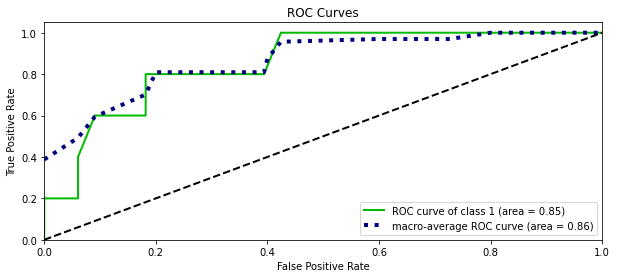



Precision-Recall Curve AUC:  0.51



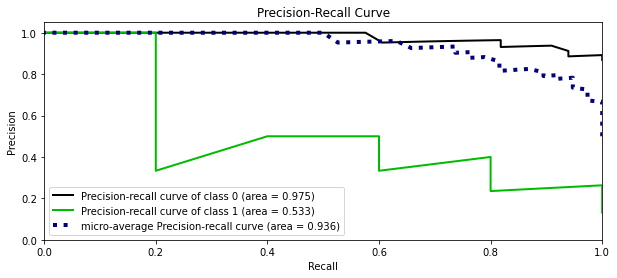

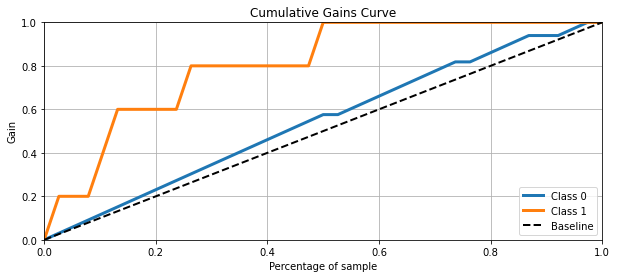

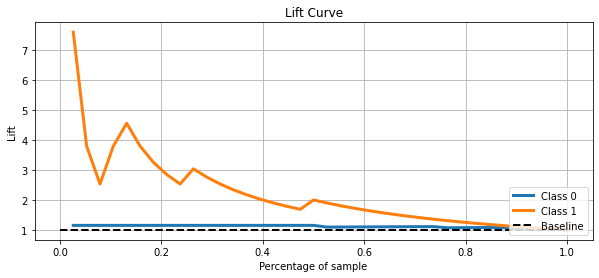



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
     0.007        0.0        0.0
     0.013        0.2        0.0
      0.02        0.2       0.06
     0.027        0.4       0.06
     0.033        0.6       0.09
      0.04        0.6       0.18
     0.047        0.8       0.18
     0.053        0.8       0.33
      0.06        0.8       0.39
     0.093        1.0       0.42
     0.113        1.0       0.48
     0.147        1.0       0.52
      0.18        1.0       0.58
      0.26        1.0       0.73
     0.307        1.0       0.85
      0.52        1.0        1.0




In [39]:
irfc = RandomForestClassifier(class_weight={0:0.25, 1:0.75}, n_estimators=150, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)
scoring = ('f1', 'recall', 'precision', 'roc_auc')
steps = [('over', SMOTE(random_state=3)), ('model', irfc)]
model_evaluate(steps, cv, X_train, y_train, X_test, y_test)

## Summary

Interesting that Random Forest only improved with SMOTE and Balanced weighting applied. It appears that adding the balanced parameter only has minor effect when compared to the effect of oversampling.   

*RandomForest with Repeated Stratified CV
    Mean f1: 0.220
    Mean recall: 0.163
    Mean precision: 0.378
    Mean ROC AUC: 0.802
RandomForest with Repeated Stratified CV with Balanced Weighting
    Mean f1: 0.097
    Mean recall: 0.065
    Mean precision: 0.222
    Mean ROC AUC: 0.812
*RandomForest with SMOTE and Repeated Stratified CV with Balanced Weighting
    Mean f1: 0.414
    Mean recall: 0.490
    Mean precision: 0.371
    Mean ROC AUC: 0.811
RandomForest with SMOTE and Repeated Stratified CV with Manual Weighting (1:3)
    Mean f1: 0.393
    Mean recall: 0.460
    Mean precision: 0.362
    Mean ROC AUC: 0.813
    
Models with a * indicate it matches with the content from balance-model-trees.ipynb
   